In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
print("="*80)
print("LOADING CRYPTOCURRENCY DATA")
print("="*80)

LOADING CRYPTOCURRENCY DATA


In [4]:
df1 = pd.read_csv('./ModelData/dogecoin.csv')
# df2 = pd.read_csv('./ModelData/bitcoin.csv')
# df3 = pd.read_csv('./ModelData/ethereum.csv')
# df4 = pd.read_csv('./ModelData/solana.csv')
# df5 = pd.read_csv('./ModelData/ripple.csv')
# df6 = pd.read_csv('./ModelData/cardano.csv')
# df7 = pd.read_csv('./ModelData/binance.csv')

In [6]:
df = df1

In [7]:

print(f"\n✓ Data loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")



✓ Data loaded successfully!
Dataset shape: 55878 rows × 12 columns


In [7]:
print("\n" + "="*80)
print("DATA DESCRIPTION")
print("="*80)



DATA DESCRIPTION


In [8]:
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

In [9]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
                'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
# Set open_time as index
df.set_index('open_time', inplace=True)
df.sort_index(inplace=True)

In [11]:
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Duration: {(df.index.max() - df.index.min()).days} days")

Date range: 2019-07-05 12:00:00 to 2025-11-20 13:00:00
Duration: 2330 days


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55878 entries, 2019-07-05 12:00:00 to 2025-11-20 13:00:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open                    55878 non-null  float64       
 1   high                    55878 non-null  float64       
 2   low                     55878 non-null  float64       
 3   close                   55878 non-null  float64       
 4   volume                  55878 non-null  float64       
 5   close_time              55878 non-null  datetime64[ns]
 6   quote_asset_volume      55878 non-null  float64       
 7   number_of_trades        55878 non-null  int64         
 8   taker_buy_base_volume   55878 non-null  float64       
 9   taker_buy_quote_volume  55878 non-null  float64       
 10  ignore                  55878 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 5.1 MB
None


In [11]:
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
open_time,,,,,,,,,,,
2019-07-05 12:00:00,0.004490,0.004600,0.003760,0.003925,949430724.0,2019-07-05 12:59:59.999,3.849419e+06,6487,405745505.0,1.649312e+06,0
2019-07-05 13:00:00,0.003915,0.003928,0.003765,0.003835,159004267.0,2019-07-05 13:59:59.999,6.100139e+05,1529,60250238.0,2.317228e+05,0
2019-07-05 14:00:00,0.003845,0.003920,0.003814,0.003841,105517060.0,2019-07-05 14:59:59.999,4.073543e+05,1241,42778068.0,1.653082e+05,0
2019-07-05 15:00:00,0.003837,0.003869,0.003710,0.003738,100804728.0,2019-07-05 15:59:59.999,3.807329e+05,1213,38727959.0,1.464109e+05,0
2019-07-05 16:00:00,0.003728,0.003734,0.003636,0.003666,120261079.0,2019-07-05 16:59:59.999,4.424968e+05,1416,47732810.0,1.756516e+05,0


In [12]:
df.tail()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
open_time,,,,,,,,,,,
2025-11-20 09:00:00,0.15777,0.15783,0.15670,0.15732,39912023.0,2025-11-20 09:59:59.999,6.277546e+06,40017,19208523.0,3.020285e+06,0
2025-11-20 10:00:00,0.15732,0.15788,0.15644,0.15780,28090426.0,2025-11-20 10:59:59.999,4.413141e+06,30433,11165167.0,1.754096e+06,0
2025-11-20 11:00:00,0.15779,0.15829,0.15724,0.15800,29930055.0,2025-11-20 11:59:59.999,4.723017e+06,28979,16383269.0,2.585664e+06,0
2025-11-20 12:00:00,0.15800,0.15925,0.15749,0.15877,31134825.0,2025-11-20 12:59:59.999,4.932681e+06,38914,12348489.0,1.957371e+06,0
2025-11-20 13:00:00,0.15878,0.15972,0.15758,0.15807,57587459.0,2025-11-20 13:59:59.999,9.132694e+06,69081,29234150.0,4.637275e+06,0


In [14]:
print("\n--- Statistical Summary ---")
df[['open', 'high', 'low', 'close', 'volume']].describe()


--- Statistical Summary ---


,open,high,low,close,volume
count,55878.000000,55878.000000,55878.000000,55878.000000,5.587800e+04
mean,0.115775,0.116832,0.114672,0.115777,7.542013e+07
std,0.104570,0.105892,0.103187,0.104569,2.472101e+08
min,0.001328,0.001491,0.001135,0.001329,0.000000e+00
25%,0.049162,0.049950,0.048284,0.049195,1.322748e+07
50%,0.084400,0.084940,0.083890,0.084410,2.914314e+07
75%,0.172500,0.173790,0.171290,0.172507,6.519092e+07
max,0.736230,0.739950,0.711170,0.736230,1.522907e+10


In [15]:
print("\n--- Missing Values ---")
df.isnull().sum()


--- Missing Values ---


open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
ignore                    0
dtype: int64

In [16]:
print("\n--- Price Statistics ---")
print(f"Highest Price: ${df['high'].max():.6f}")
print(f"Lowest Price: ${df['low'].min():.6f}")
print(f"Average Close Price: ${df['close'].mean():.6f}")
print(f"Price Volatility (Std Dev): ${df['close'].std():.6f}")

print("\n--- Volume Statistics ---")
print(f"Total Volume: {df['volume'].sum():,.0f}")
print(f"Average Daily Volume: {df['volume'].mean():,.0f}")
print(f"Max Volume: {df['volume'].max():,.0f}")


--- Price Statistics ---
Highest Price: $0.739950
Lowest Price: $0.001135
Average Close Price: $0.115777
Price Volatility (Std Dev): $0.104569

--- Volume Statistics ---
Total Volume: 4,214,325,906,784
Average Daily Volume: 75,420,128
Max Volume: 15,229,066,811



HOURLY VISUALIZATION


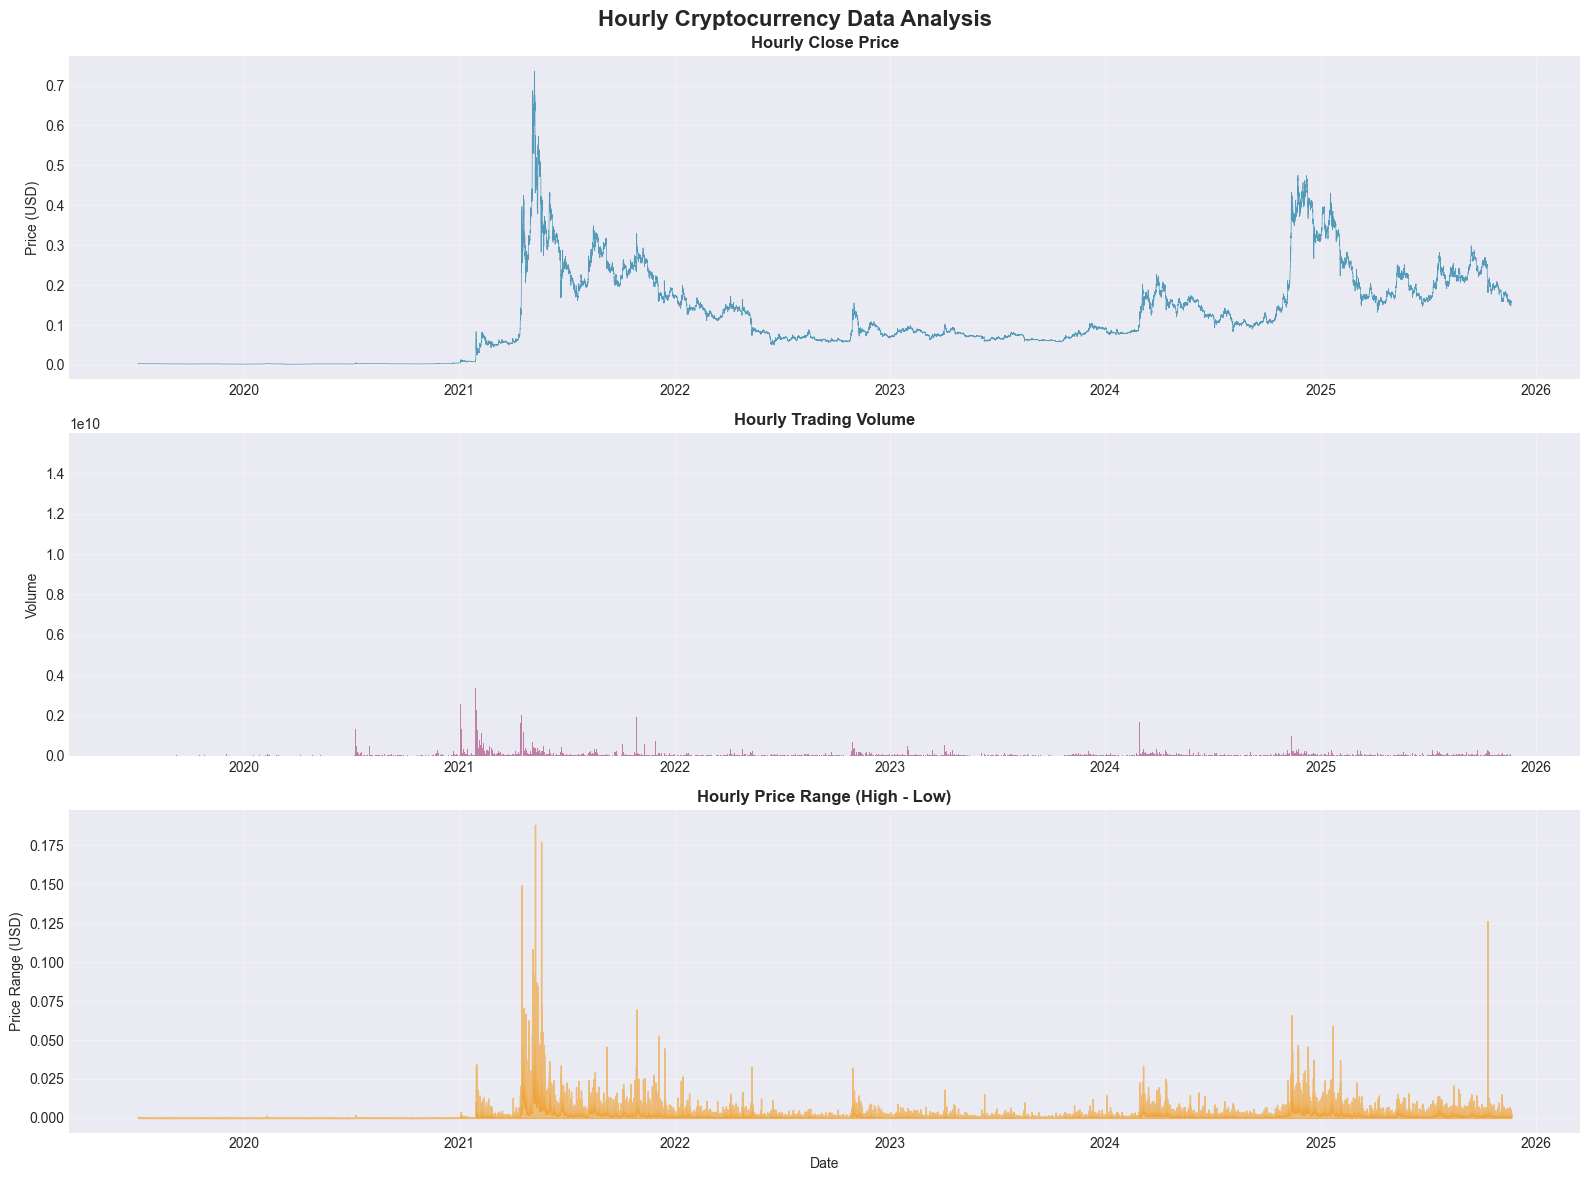

In [17]:
# ============================================================================
# 4. HOURLY VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("HOURLY VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('Hourly Cryptocurrency Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Hourly Price
ax1 = axes[0]
ax1.plot(df.index, df['close'], linewidth=0.5, color='#2E86AB', alpha=0.8)
ax1.set_title('Hourly Close Price', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price (USD)', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('')

# Plot 2: Hourly Volume
ax2 = axes[1]
ax2.bar(df.index, df['volume'], width=0.04, color='#A23B72', alpha=0.6)
ax2.set_title('Hourly Trading Volume', fontsize=12, fontweight='bold')
ax2.set_ylabel('Volume', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('')

# Plot 3: Hourly Price Range (High-Low)
ax3 = axes[2]
price_range = df['high'] - df['low']
ax3.fill_between(df.index, price_range, alpha=0.5, color='#F18F01')
ax3.set_title('Hourly Price Range (High - Low)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Price Range (USD)', fontsize=10)
ax3.set_xlabel('Date', fontsize=10)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


YEARLY VISUALIZATION

Yearly data points: 7

--- Yearly Statistics ---
                open     high       low     close        volume       return
open_time                                                                   
2019-12-31  0.004490  0.00460  0.001900  0.002014  2.738913e+10   -55.155902
2020-12-31  0.002014  0.00560  0.001135  0.004671  2.696078e+11   131.967620
2021-12-31  0.004672  0.73995  0.004601  0.170300  1.873299e+12  3545.431972
2022-12-31  0.170300  0.21480  0.049140  0.070250  4.792985e+11   -58.749266
2023-12-31  0.070240  0.10730  0.053000  0.089550  4.030674e+11    27.491458
2024-12-31  0.089560  0.48434  0.074120  0.316000  7.208334e+11   252.836088
2025-12-31  0.316000  0.43408  0.095000  0.158070  4.408306e+11   -49.977848


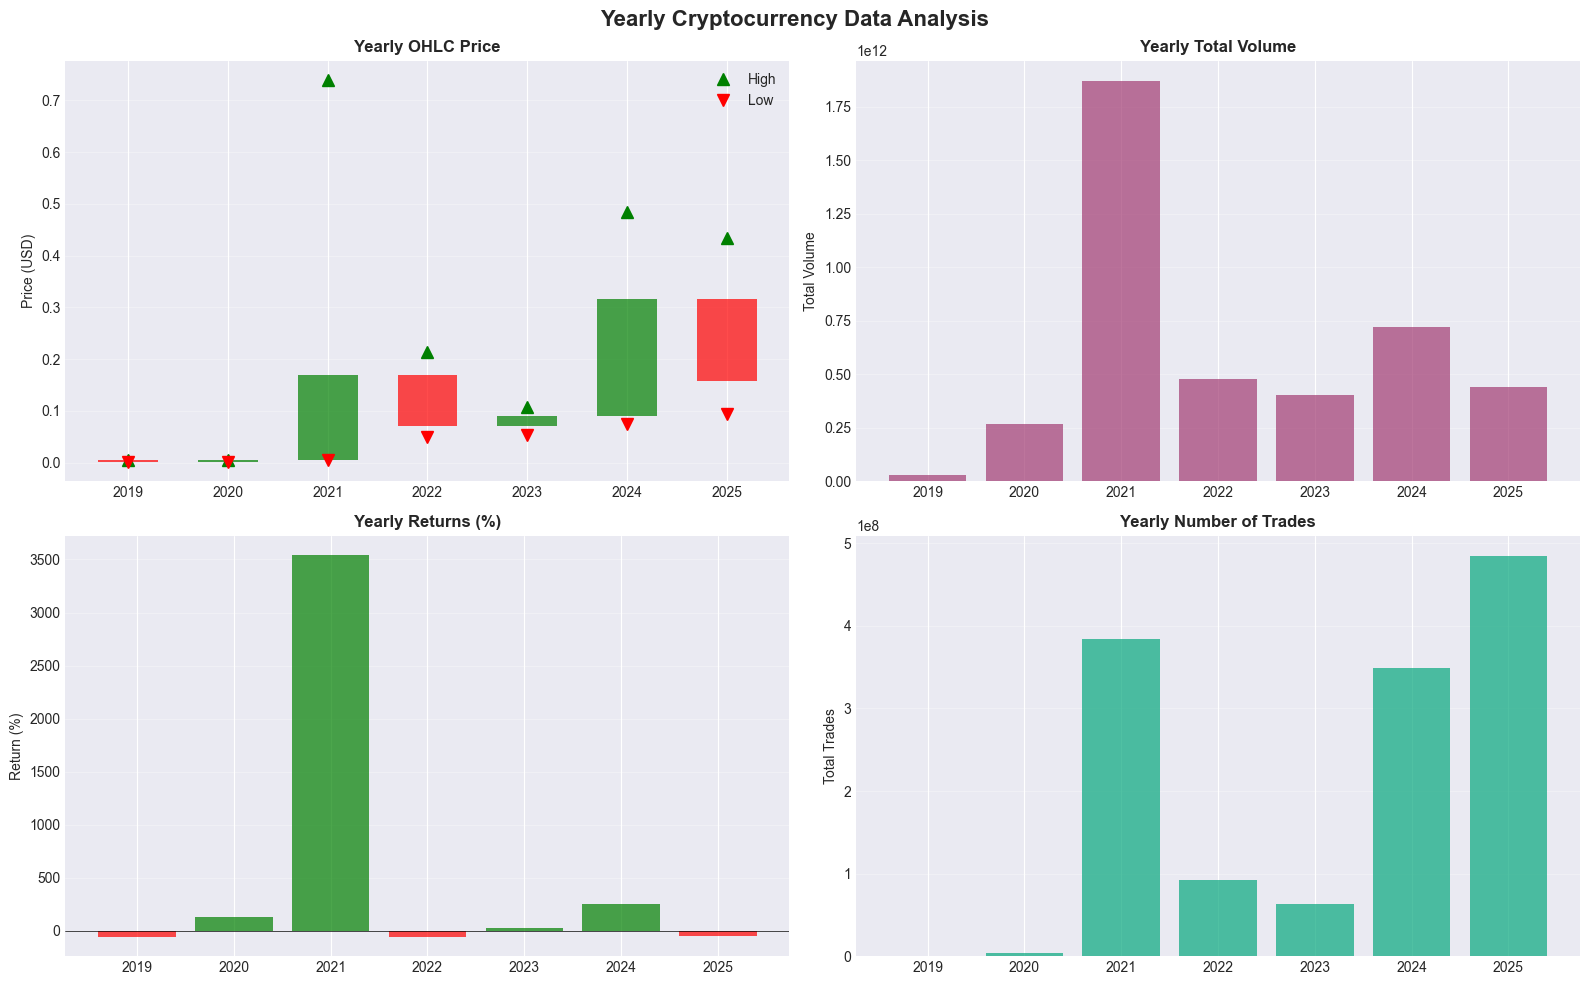

In [19]:
# ============================================================================
# 6. YEARLY AGGREGATION & VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("YEARLY VISUALIZATION")
print("="*80)

# Resample to yearly data
df_yearly = df.resample('Y').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'number_of_trades': 'sum'
})

# Calculate yearly returns
df_yearly['return'] = ((df_yearly['close'] - df_yearly['open']) / df_yearly['open']) * 100

print(f"\nYearly data points: {len(df_yearly)}")
print("\n--- Yearly Statistics ---")
print(df_yearly[['open', 'high', 'low', 'close', 'volume', 'return']])

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Yearly Cryptocurrency Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Yearly OHLC
ax1 = axes[0, 0]
x_pos = np.arange(len(df_yearly))
years = df_yearly.index.year
width = 0.6

ax1.bar(x_pos, df_yearly['close'] - df_yearly['open'], bottom=df_yearly['open'],
        width=width, alpha=0.7, 
        color=['green' if c >= o else 'red' 
               for c, o in zip(df_yearly['close'], df_yearly['open'])])
ax1.plot(x_pos, df_yearly['high'], 'g^', markersize=8, label='High')
ax1.plot(x_pos, df_yearly['low'], 'rv', markersize=8, label='Low')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(years)
ax1.set_title('Yearly OHLC Price', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price (USD)', fontsize=10)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Yearly Volume
ax2 = axes[0, 1]
ax2.bar(years, df_yearly['volume'], color='#A23B72', alpha=0.7)
ax2.set_title('Yearly Total Volume', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Volume', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Yearly Returns
ax3 = axes[1, 0]
colors_return = ['green' if r > 0 else 'red' for r in df_yearly['return']]
ax3.bar(years, df_yearly['return'], color=colors_return, alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.set_title('Yearly Returns (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Return (%)', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Yearly Trading Activity
ax4 = axes[1, 1]
ax4.bar(years, df_yearly['number_of_trades'], color='#06A77D', alpha=0.7)
ax4.set_title('Yearly Number of Trades', fontsize=12, fontweight='bold')
ax4.set_ylabel('Total Trades', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# DATA PREPROCESSING
# ============================================================================

In [12]:
df.duplicated().sum()
df.shape

(55878, 11)

# Outlier Detection

In [13]:
# Select numerical columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute Q1, Q3 and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame showing where outliers are
outliers = (df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)

# Display percentage of outliers per feature
outlier_percent = 100 * outliers.sum() / len(df)

print(outlier_percent)

open                       3.298257
high                       3.368052
low                        3.180142
close                      3.298257
volume                    10.233008
quote_asset_volume        11.199399
number_of_trades          10.735889
taker_buy_base_volume     10.233008
taker_buy_quote_volume    11.199399
ignore                     0.000000
dtype: float64


In [14]:
# Columns to treat with IQR
cols_to_treat = [
    'quote_asset_volume', 'number_of_trades', 'taker_buy_base_volume', 'taker_buy_quote_volume'
]

# Compute IQR only for selected columns
Q1 = df[cols_to_treat].quantile(0.25)
Q3 = df[cols_to_treat].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply clipping [winsorization]
df = df.copy()
df[cols_to_treat] = df[cols_to_treat].clip(
    lower=lower_bound,
    upper=upper_bound,
    axis=1
)

In [15]:
# Select numerical columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute Q1, Q3 and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame showing where outliers are
outliers = (df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)

# Display percentage of outliers per feature
outlier_percent = 100 * outliers.sum() / len(df)

print(outlier_percent)

open                       3.298257
high                       3.368052
low                        3.180142
close                      3.298257
volume                    10.233008
quote_asset_volume         0.000000
number_of_trades           0.000000
taker_buy_base_volume      0.000000
taker_buy_quote_volume     0.000000
ignore                     0.000000
dtype: float64


In [20]:
! pip install scikit-learn

In [21]:
import sklearn

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Remove datetime & non-numeric columns
df_clean = df.select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean)

scaled_df = pd.DataFrame(scaled, columns=df_clean.columns, index=df.index)


In [24]:
scaled_df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
open_time,,,,,,,,,,
2019-07-05 12:00:00,0.004303,0.004210,0.003698,0.003532,0.062343,0.178355,0.110774,1.000000,0.155261,0.0
2019-07-05 13:00:00,0.003521,0.003300,0.003705,0.003410,0.010441,0.028264,0.026110,0.847658,0.021814,0.0
2019-07-05 14:00:00,0.003425,0.003289,0.003774,0.003419,0.006929,0.018874,0.021192,0.601843,0.015562,0.0
2019-07-05 15:00:00,0.003414,0.003220,0.003627,0.003278,0.006619,0.017640,0.020714,0.544862,0.013783,0.0
2019-07-05 16:00:00,0.003265,0.003037,0.003524,0.003181,0.007897,0.020502,0.024180,0.671551,0.016535,0.0
